EQE512 MATRIX METHODS IN STRUCTURAL ANALYSIS 

---
<h3 align="center"><font color = red >Week 10 - OpenSeesPy - Frame Systems </font></h3> 

<h4 align="center">Dr. Ahmet Anıl Dindar (adindar@gtu.edu.tr)</h3> 
<h4 align="center">2020 Fall  </h4> 

---

This code is composed of three sections, namely 

A. Pre-process

B. Process

C. Post-Process

---

Problem: This is a multistory 2D Elastic RC frame under static loads

# A. Pre-Process

In [2]:
# from openseespy import *

import openseespy.opensees as ops

In [3]:
ops.wipe() # Clear all OS values

In [4]:
ops.model( "Basic", "-ndm", 2 , "-ndf", 3) # This is a 2D Frame

In [5]:
numBay = 2
numFloor = 7

In [6]:
bayWidht = 3.0 # m
storyHeight = 3.0 # m

In [7]:
E = 295000000 # kN/m2
massX = 0.49
M = 0. 
coordTransfer = "Linear" # Linear Transformation
massType = "-lMass" # Lumped mass

In [8]:
beams = [ "B20X50" for item in range( numFloor)]
eColumn = [ "C50X50" for item in range( numFloor)]
iColumn = [ "C50X50" for item in range( numFloor)]

columns = [eColumn , iColumn , eColumn]

In [9]:
Section = { "C50X50" : [ 0.5 * .5 , (0.5*0.5**3)/12],
          "B20X50": [0.2*.5 , (.2*0.5**3)/12]}

In [10]:
Section

{'C50X50': [0.25, 0.005208333333333333],
 'B20X50': [0.1, 0.0020833333333333333]}

In [11]:
def ElasticBeamColum( eleTag, iNode, jNode, sectType, E, transfTag, M, massType) :
    
    prop = Section[sectType]
    Area = prop[0]
    I = prop[1]
    
    ops.element( "elasticBeamColumn", eleTag ,iNode, jNode, Area, E , I , transfTag , "-mass", M, massType)

In [12]:
import numpy as np
axis_h = np.linspace( 0 , (numBay * bayWidht)  ,numBay+1)
axis_v = np.linspace( 0 , (numFloor * storyHeight)  ,numFloor+1)


In [13]:
node_no =  1
node_dict = {}
floorNo = 0
floorNodes = {}
nodes = []
for i in axis_v:
    floorNodes[floorNo] = []
    
    for j in axis_h:
        nodes.append(node_no)

        # OPENSEES COMMAND
        ops.node( node_no , float(j) , float(i))
        
        node_dict[node_no] = [float(j) , float(i)]
        floorNodes[floorNo].append(node_no)
        
        
        node_no += 1
    floorNo += 1

In [14]:
for nodeNumber in floorNodes[0]:
    ops.fix( nodeNumber , 1,1,1)

In [15]:
# Rigid Diaphram Assignment
floorNodes

{0: [1, 2, 3],
 1: [4, 5, 6],
 2: [7, 8, 9],
 3: [10, 11, 12],
 4: [13, 14, 15],
 5: [16, 17, 18],
 6: [19, 20, 21],
 7: [22, 23, 24]}

In [16]:
for key, value in floorNodes.items():
    for item in value[:]:
        if item == value[0]:
            ops.mass( item , massX , 0.000001 , 0.0000001 )
        else: 
            ops.equalDOF( value[0] , item , 1)

Adding columns

In [17]:
ops.geomTransf(coordTransfer, 1)
column_dict = {}
eleTag = 1 
for  j in range(0 , numBay + 1):
    end1 = j + 1
    end2 = end1 + numBay + 1
    thisColumn = columns[j]
    
    for i in range( 0 ,numFloor):
        secType = thisColumn[ i]
        ElasticBeamColum( eleTag, end1 , end2 , secType , E , 1, M , massType)
        column_dict[eleTag] = [end1, end2]
        end1 =end2
        end2 += numBay + 1

        
        eleTag += 1
        

In [18]:
eleTag

22

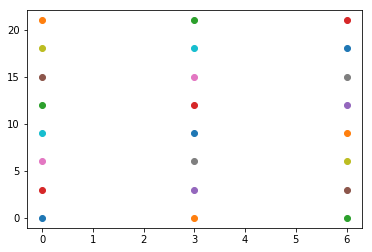

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

for key in node_dict.keys():
    plt.plot( node_dict[key][0] ,  node_dict[key][1] , "o"  )

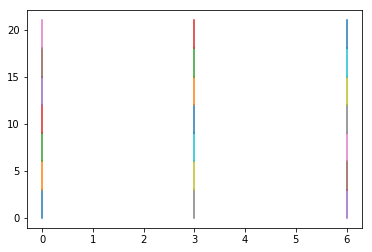

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

for key in column_dict.keys():
    plt.plot([ node_dict[column_dict[key][0]][0] ,node_dict[column_dict[key][1]][0]],
              [ node_dict[column_dict[key][0]][1] ,node_dict[column_dict[key][1]][1]]  )
    

In [21]:
beam_dict = {}
for j in range( 1 , numFloor +1):
    end1 = (numBay + 1) * j + 1
    end2 = end1+1
    secType = beams[j -1 ]
    for i in range(0, numBay):
        ElasticBeamColum(eleTag, end1, end2, secType, E, 1, M, massType) 
        beam_dict[eleTag] = [end1, end2]
        end1 = end2
        end2 = end1 + 1
        eleTag += 1

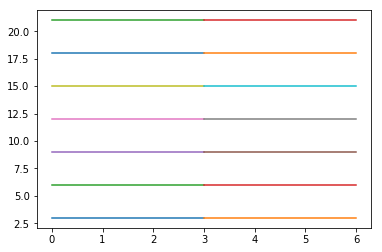

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

for key in beam_dict.keys():
    plt.plot([ node_dict[beam_dict[key][0]][0] ,node_dict[beam_dict[key][1]][0]],
              [ node_dict[beam_dict[key][0]][1] ,node_dict[beam_dict[key][1]][1]]  )
    

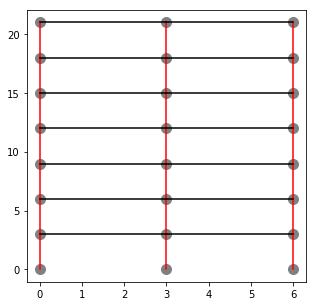

In [23]:
plt.figure(figsize= (5,5))


for key in node_dict.keys():
    plt.plot( node_dict[key][0] ,  node_dict[key][1] , "o" , MS = 10 , color="gray")
for key in column_dict.keys():
    plt.plot([ node_dict[column_dict[key][0]][0] ,node_dict[column_dict[key][1]][0]],
              [ node_dict[column_dict[key][0]][1] ,node_dict[column_dict[key][1]][1]]  
            , color="red")
for key in beam_dict.keys():
    plt.plot([ node_dict[beam_dict[key][0]][0] ,node_dict[beam_dict[key][1]][0]],
              [ node_dict[beam_dict[key][0]][1] ,node_dict[beam_dict[key][1]][1]] 
            , color="k")
    

In [24]:
from math import asin, sqrt


numEigen = 7 
eigenValues = ops.eigen( numEigen) 

PI = 3.14

In [25]:
eigenValues

[40898.006755245544,
 418116.1082909055,
 1441555.4077161986,
 3433425.5559456474,
 6735145.148448223,
 11072966.010694316,
 15075176.509318342]

**LOADS**

In [26]:
ops.timeSeries("Linear",1)
ops.pattern( "Plain" ,1,1)

load_dict = {4 : 20000 , 7 : 20000}

for key in load_dict.keys():
    ops.load( key , load_dict[key] , 0  , 0)

# B. Process

In [27]:
ops.integrator('LoadControl', 1.0)
ops.algorithm('Linear')
ops.analysis('Static')
ops.analyze(1)

0

# C. Post-Process

In [28]:
node_dict[1][0]

0.0

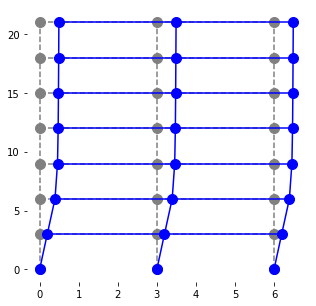

In [29]:
scale = 5
node_deform_dict = {}
for i in node_dict.keys():
    node_deform_dict[i] = [node_dict[i][0] + scale*(ops.nodeDisp(i,1)) , node_dict[i][1]]
#    print( f"{i} node disp = {round( ops.nodeDisp(i,1),5)}")

plt.figure(figsize= (5,5))
for key in node_dict.keys():
    plt.plot( node_dict[key][0] ,  node_dict[key][1] , "o" , MS = 10 , color="gray")
for key in column_dict.keys():
    plt.plot([ node_dict[column_dict[key][0]][0] ,node_dict[column_dict[key][1]][0]],
              [ node_dict[column_dict[key][0]][1] ,node_dict[column_dict[key][1]][1]]  
            ,"--", color="gray")
for key in beam_dict.keys():
    plt.plot([ node_dict[beam_dict[key][0]][0] ,node_dict[beam_dict[key][1]][0]],
              [ node_dict[beam_dict[key][0]][1] ,node_dict[beam_dict[key][1]][1]] 
            , "--",color="gray")

for key in node_deform_dict.keys():
    plt.plot( node_deform_dict[key][0] ,  node_deform_dict[key][1] , "o" , MS = 10 , color="b")
for key in column_dict.keys():
    plt.plot([ node_deform_dict[column_dict[key][0]][0] ,node_deform_dict[column_dict[key][1]][0]],
              [ node_deform_dict[column_dict[key][0]][1] ,node_deform_dict[column_dict[key][1]][1]]  
            , color="b")
for key in beam_dict.keys():
    plt.plot([ node_deform_dict[beam_dict[key][0]][0] ,node_deform_dict[beam_dict[key][1]][0]],
              [ node_deform_dict[beam_dict[key][0]][1] ,node_deform_dict[beam_dict[key][1]][1]] 
            , color="b")
plt.box(False)

**Modal Analysis Results**

In [30]:
periods = [ 2* PI / sqrt(lamb)  for lamb in eigenValues ]
for count, i in enumerate( periods) : 
    print(f"{count+1} mode number and period ={round(i ,4 )}sn")

1 mode number and period =0.0311sn
2 mode number and period =0.0097sn
3 mode number and period =0.0052sn
4 mode number and period =0.0034sn
5 mode number and period =0.0024sn
6 mode number and period =0.0019sn
7 mode number and period =0.0016sn


---

**NEXT WEEK**

<table >
<tr>
<td>
<img src="http://worshiphousemedia.s3.amazonaws.com/images/main/s/st/bnt/st/seeyounextweek1.jpg" width="40%">
</td>
<td align="left"><strong style="font-size: 20px;">
The topics for the next week 
<br><br>

1- Assignment : -
    
2- System behavior
<br><br>

<br>
</td>
</tr>
</table>